In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab_ass03_2024.ipynb")

# Computer Assignment 3

Make sure the code below works and plays audio that you can hear.

In [2]:
import numpy as np
import sounddevice as sd

fs = 8192
y = np.loadtxt('../data/handel8192.txt')
sd.play(y,fs) # Test 0

***
**Task 1**:  FIR filtering of narrowband interference
***

We synthesise a signal corrupted by narrowband interference at frequency $\omega_I = 2 \pi/10 = 8 \pi/40$ rad/s.

In [3]:
yc = y + 1.0*np.sin(2*np.pi/10*np.arange(len(y)))
#sd.play(yc,fs) # Test 1

Use a filter design tool with the "equiripple" Parks–McClellan algorithm to find a minimum order finite impulse response notch or bandstop filter to null the interference.  The filter should pass all frequencies $\omega < 6 \pi/40$ and $\omega > 10\pi/40$ with less than 0.1dB of ripple, and it should provide at least 60dB of attenuation over the range $7\pi/40 < \omega < 9\pi/40$.  Place the impulse response values in the vector `bv` below, and confirm that the filter evidently eliminates the interference (and some of the signal) from the corrupted audio clip.

If you're using pyFDA then it's possible to copy the filter coefficients to the clipboard from the "b,a" tab.  Open the "CSV" settings dialog, choose "Table mode" as "Rows", and select the "Clipboard" output.  You can then copy to clipboard, paste the values into a Jupyter cell, and add some minor edits to generate the required vector.

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


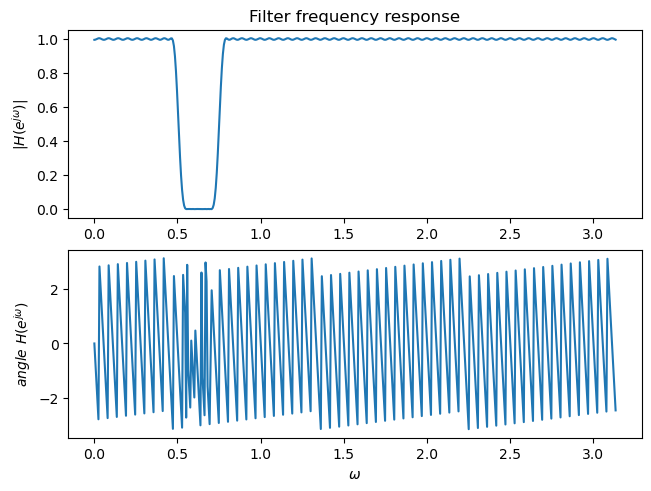

In [4]:
from scipy import signal
import matplotlib.pyplot as plt

# Null (identity) filter below
a1v = np.ones((1,))  # no poles
b1v = np.ones((1,))  # single impulse

# Update FIR filter impulse response using results of filter design process
b1v = np.array((0.001596070718703211,-0.0013843547370730595,-0.0011562525018749268,-0.000968247592321031,-0.000688591671529725,-0.00032124893468349423,3.0935704493778216e-05,0.00024542612688385377,0.00026593498428973734,0.00014412404899989177,1.2064845219200387e-05,-1.0860418534794397e-06,0.00014078588978606163,0.0003423142331293007,0.00042213110364400734,0.00022452331704651336,-0.00026332712071703397,-0.0008619761437616894,-0.001261420806437292,-0.0011756578151735793,-0.0005133604389983645,0.0005317721715651024,0.0015341115912537577,0.002022769844379196,0.001716265088203704,0.0006835733334180091,-0.0006620796762510869,-0.001746495269886966,-0.0021090483830414055,-0.0016287977167468673,-0.000581451330863553,0.0005093530731939898,0.0011508503953760285,0.0011392635779211384,0.0006536793923627689,0.00013004352304785653,-2.039548748998746e-05,0.00032010182103970854,0.0008693290933106975,0.0011116157399095523,0.0005934332125603182,-0.0007073406728171354,-0.002300341911729504,-0.0033536053040739127,-0.0031113418536150303,-0.0013481018060270348,0.001405539344006576,0.00402298945198451,0.005280821250573347,0.004464741841723716,0.0017713722495058275,-0.0017221081406049539,-0.004534741988001659,-0.005482373806725276,-0.004249275938909039,-0.0015296816783557552,0.0013441142821161308,0.003097500662087725,0.0031636175328219334,0.0019344029383510637,0.0004708991038976545,-0.00016919826666353892,0.0003956884729757548,0.0015981654400480676,0.0022376170200687395,0.0012375198643137277,-0.0015764986760190495,-0.005150296635811272,-0.007583293934107967,-0.007092006946313855,-0.0030740154142087296,0.0033220698274515005,0.009503927207587614,0.012561212171006812,0.0107017283772336,0.004260399013632621,-0.004273558844141377,-0.011319863863278034,-0.013862780078925335,-0.010914263648357406,-0.0039883978740766915,0.003654898289295392,0.008657717505925222,0.00925153065115368,0.006080402352139445,0.001701602867975666,-0.0009828093568707533,-0.0005063854854127478,0.0021951375693631367,0.004259371919514221,0.0026565030646644285,-0.0036922196921595827,-0.012673990921758025,-0.01950359542847715,-0.018988419104528195,-0.008529231937211426,0.009715475679530327,0.028848412925409253,0.03980128139094814,0.03551597060623923,0.014831518248403305,-0.015933889747409478,-0.044808245809784,-0.05894055152337391,-0.05037700258396397,-0.020210728543386167,0.02099235437594325,0.05701112569814021,0.07260855883358139,0.06017892071992024,0.023425920856409443,-0.023708806410742477,-0.06258514502906015,0.9224344645640133,-0.06258514502906015,-0.023708806410742477,0.023425920856409443,0.06017892071992024,0.07260855883358139,0.05701112569814021,0.02099235437594325,-0.020210728543386167,-0.05037700258396397,-0.05894055152337391,-0.044808245809784,-0.015933889747409478,0.014831518248403305,0.03551597060623923,0.03980128139094814,0.028848412925409253,0.009715475679530327,-0.008529231937211426,-0.018988419104528195,-0.01950359542847715,-0.012673990921758025,-0.0036922196921595827,0.0026565030646644285,0.004259371919514221,0.0021951375693631367,-0.0005063854854127478,-0.0009828093568707533,0.001701602867975666,0.006080402352139445,0.00925153065115368,0.008657717505925222,0.003654898289295392,-0.0039883978740766915,-0.010914263648357406,-0.013862780078925335,-0.011319863863278034,-0.004273558844141377,0.004260399013632621,0.0107017283772336,0.012561212171006812,0.009503927207587614,0.0033220698274515005,-0.0030740154142087296,-0.007092006946313855,-0.007583293934107967,-0.005150296635811272,-0.0015764986760190495,0.0012375198643137277,0.0022376170200687395,0.0015981654400480676,0.0003956884729757548,-0.00016919826666353892,0.0004708991038976545,0.0019344029383510637,0.0031636175328219334,0.003097500662087725,0.0013441142821161308,-0.0015296816783557552,-0.004249275938909039,-0.005482373806725276,-0.004534741988001659,-0.0017221081406049539,0.0017713722495058275,0.004464741841723716,0.005280821250573347,0.00402298945198451,0.001405539344006576,-0.0013481018060270348,-0.0031113418536150303,-0.0033536053040739127,-0.002300341911729504,-0.0007073406728171354,0.0005934332125603182,0.0011116157399095523,0.0008693290933106975,0.00032010182103970854,-2.039548748998746e-05,0.00013004352304785653,0.0006536793923627689,0.0011392635779211384,0.0011508503953760285,0.0005093530731939898,-0.000581451330863553,-0.0016287977167468673,-0.0021090483830414055,-0.001746495269886966,-0.0006620796762510869,0.0006835733334180091,0.001716265088203704,0.002022769844379196,0.0015341115912537577,0.0005317721715651024,-0.0005133604389983645,-0.0011756578151735793,-0.001261420806437292,-0.0008619761437616894,-0.00026332712071703397,0.00022452331704651336,0.00042213110364400734,0.0003423142331293007,0.00014078588978606163,-1.0860418534794397e-06,1.2064845219200387e-05,0.00014412404899989177,0.00026593498428973734,0.00024542612688385377,3.0935704493778216e-05,-0.00032124893468349423,-0.000688591671529725,-0.000968247592321031,-0.0011562525018749268,-0.0013843547370730595,0.001596070718703211))

# Plot frequency response corresponding to bv, av above
(w1v,H1v) = signal.freqz(b1v,a1v)

# Plot frequency response magnitude and phase
fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(w1v, np.abs(H1v))
axs[0].set_title('Filter frequency response')
axs[0].set_ylabel('$|H(e^{j \omega})|$')

axs[1].plot(w1v, np.angle(H1v))
axs[1].set_xlabel('$\omega$')
axs[1].set_ylabel('$\t{angle}~H(e^{j \omega})$');

In [5]:
# Filter signal (numerator is bv and usually av[0]=1)
y1v = signal.lfilter(b1v,a1v,yc)
#sd.play(y1v,fs)

In [6]:
grader.check("lab_ass03_q1a")

lab_ass03_q1a results: All test cases passed!
lab_ass03_q1a - 1 message: have len(a1v)==1 and a1v[0]==1
lab_ass03_q1a - 2 message: b1v has correct dimension of one

In [7]:
#sd.play(y1v,fs) # Test 2

***
**Task 2**:  IIR filtering of narrowband interference
***

We synthesise a signal corrupted by narrowband interference at frequency $\omega_I = 2 \pi/10 = 8 \pi/40$ rad/s.

In [8]:
yc = y + 1.0*np.sin(2*np.pi/10*np.arange(len(y)))
#sd.play(yc,fs) # Test 3

Design an infinite impulse response filter that satisfies the same requirements as above using the "Elliptic" method.  You should observe that the IIR filter can be implemented with significantly less computation than the FIR filter, but it will have a nonlinear phase response.  You can confirm that this nonlinear phase characteristic does not appear to cause audible distortions in the output.  Apparently our ears are not sensitive to phase.

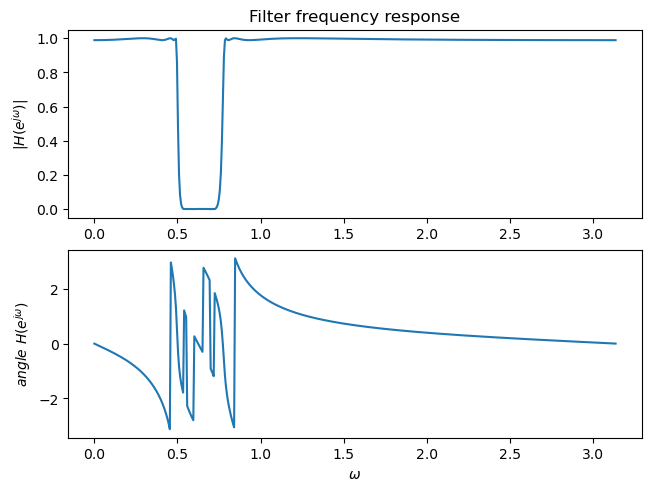

In [9]:
from scipy import signal
import matplotlib.pyplot as plt

# Null (identity) filter below
a2v = np.ones((1,))  # no poles
b2v = np.ones((1,))  # single impulse

# Update filter parameters using results from filter design tool

b2v = np.array((0.578712273045301,-5.608495934234451,26.108081389960603,-76.741516814039,158.12758946835334,-240.16053313740392,275.39396206142237,-240.16053313740386,158.1275894683533,-76.74151681403897,26.108081389960585,-5.608495934234446,0.5787122730453005))
a2v = np.array((1.0,-8.825631019729776,37.42278504852467,-100.2737394961952,188.53785858775694,-261.5923323677239,274.37705613429705,-219.14737354535777,132.3398376538698,-58.99480848909358,18.465813596063775,-3.6561990820910553,0.34838848285331947))

# Plot frequency response corresponding to bv, av above
(w2v,H2v) = signal.freqz(b2v,a2v)

# Plot frequency response magnitude and phase
fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(w2v, np.abs(H2v))
axs[0].set_title('Filter frequency response')
axs[0].set_ylabel('$|H(e^{j \omega})|$')

axs[1].plot(w2v, np.angle(H2v))
axs[1].set_xlabel('$\omega$')
axs[1].set_ylabel('$\t{angle}~H(e^{j \omega})$');

In [10]:
# Filter signal (numerator is bv and usually av[0]=1)
y2v = signal.lfilter(b2v,a2v,yc)
#sd.play(y2v,fs)

In [11]:
grader.check("lab_ass03_q1b")

lab_ass03_q1b results: All test cases passed!
lab_ass03_q1b - 1 message: for IIR filter we have len(a2v)!=1 as required
lab_ass03_q1b - 2 message: b2v and a2v have correct dimension of one

In [12]:
#sd.play(y2v,fs) # Test 4

***
**Task 3**:  Upsampling by rational factor
***

Suppose we want to do sampling rate conversion of the signal `y` sampled at frequency `fs` to produce `yu` that can be played using `sd.play(yu3d2,fs*3/2)`.  This requires expanding the signal by a factor of 3, filtering the result with a lowpass filter with cutoff $\omega_c = \pi/3$, and discarding every second sample from the result.

Complete the function `sigu3d2(y)` below that takes the input signal `y` and generates the required upsampled signal `yu`.  You can test that your function is working using `sd.play`.

Your lowpass filter should have less than 1dB of ripple for $\omega < 0.8 \omega_c$ and at least 40dB of attenuation for $\omega > 1.2 \omega_c$.  You can use any filter structure you like, but try to see if you can keep computational requirements low.

In [13]:
def sigu3d2(y):

  # Lowpass filter with cutoff wc=pi/3

  bv = np.array((0.029128731073997702,-0.07618143961084309,0.18669617827385798,-0.25969964533176454,0.3603691088962631,-0.351986284398907,0.36036910889626306,-0.2596996453317645,0.18669617827385795,-0.07618143961084307,0.029128731073997695))
  av = np.array((1.0,-5.423400072507906,15.990577644138984,-31.22532849993255,44.24443675812334,-46.902623767202265,37.612498231758245,-22.48324770648073,9.644681556855037,-2.7000564999033676,0.3867983403379276))
  
  bv = 3*bv  # need additional filter gain 

  # Input expanded by factor 3
  yu3 = np.zeros((3*len(y),))
  yu3[::3] = y;

  # Interpolation using lowpass filter
  yu3f = signal.lfilter(bv,av,yu3)

  # Result downsampled by factor 2
  yu = yu3f[::2]
  return yu

In [14]:
# Upsample and play audio
yu = sigu3d2(y)
sd.play(yu,fs*3/2)

In [15]:
grader.check("lab_ass03_q1c")

lab_ass03_q1c results: All test cases passed!
lab_ass03_q1c - 1 message: upsampled output has required dimension
lab_ass03_q1c - 2 message: upsampled signal length ~1.5x input signal length

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [18]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




RuntimeError: ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
